In [1]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
font_size = 26
plt.rcParams.update({'font.size': font_size})

# Initialize API (make sure you're logged in)
api = wandb.Api()

# Define your project and entity
project_name = "Multimodal-Fusion-Bottleneck"
entity_name = "wojaczek27"

# # Fetch runs from the specified project
runs_data = api.runs(f"{entity_name}/{project_name}")

In [2]:
base_scores = {
    "Bleu_4":0.2430,
    "ROUGE_L":0.5080,
    "METEOR":0.2450,
    "CIDEr":1.139,
}

video_base_scores = {
    "Bleu_4":0.209,
    "ROUGE_L":0.468,
    "METEOR":0.217,
    "CIDEr":0.956,
}

corrected_values_dict = {
    "BERT":1
}

Duplicate configuration: CLIP_bbx_True_lineup_diag_False
Duplicate configuration: BERT_bbx_False_lineup_diag_False
Duplicate configuration: CLIP_bbx_True_lineup_diag_True
Duplicate configuration: CLIP_bbx_True_possession_diag_False
Duplicate configuration: CLIP_bbx_False_possession_diag_False
Duplicate configuration: CLIP_bbx_False_possession_diag_True
Duplicate configuration: CLIP_bbx_True_possession_diag_True
Duplicate configuration: BERT_bbx_True_lineup_diag_True
Duplicate configuration: BERT_bbx_False_lineup_diag_True
Duplicate configuration: None_bbx_False_lineup_diag_True
Duplicate configuration: RANDOM_bbx_False_lineup_diag_False
Duplicate configuration: RANDOM_bbx_False_lineup_diag_True


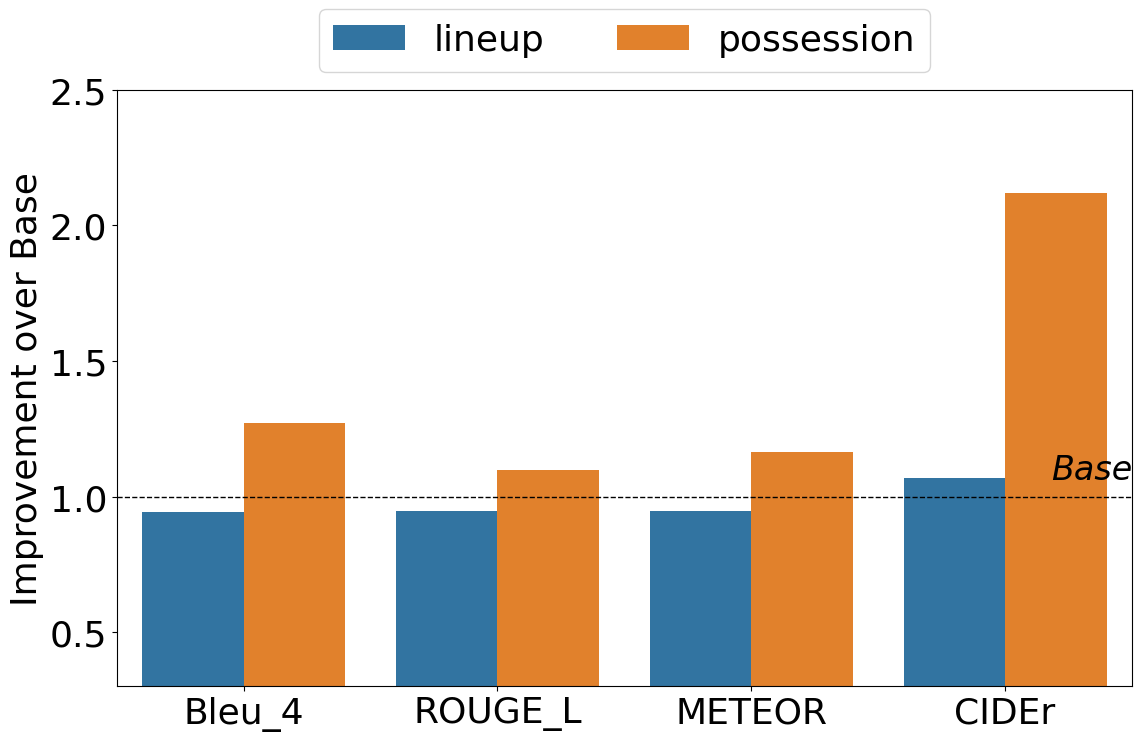

In [3]:
# Fetch runs from the specified project
runs_data = api.runs(f"{entity_name}/{project_name}")

# Prepare a list to hold processed data
data = []
log = {}
# Iterate over runs to process configurations
for run in runs_data:
    # Fetch configurations
    player_embedding = run.config.get("player_embedding", None)
    use_random_embeddings = run.config.get("use_random_embeddings", False)
    use_BBX_features = run.config.get("use_BBX_features", False)
    player_embedding_order = run.config.get("player_embedding_order", None) 
    visual_use_diagonal_masking = run.config.get("visual_use_diagonal_masking", None) 
    # Fetching additional metrics
    cider_score = run.summary.get("CIDEr", None)
    bleu_4_score = run.summary.get("Bleu_4", None)
    rouge_l_score = run.summary.get("ROUGE_L", None)
    meteor_score = run.summary.get("METEOR", None)
    
    # Check if use_random_embeddings is True and update player_embedding accordingly
    if use_random_embeddings:
        player_embedding = "RANDOM"
    
    if player_embedding == "Rand":
        player_embedding = "RANDOM"
    
    
    # Your existing filter conditions
    if cider_score is not None and player_embedding_order is not None and player_embedding_order != "BC"  and player_embedding_order != "lineup-ordered":
        identifier = f"{player_embedding}_bbx_{use_BBX_features}_{player_embedding_order}_diag_{visual_use_diagonal_masking}"
        if log.get(identifier, False):
            # Only one run per configuration
            print(f"Duplicate configuration: {identifier}")
            continue
        log[identifier] = True
        data.append({
            "id": run.id,
            "player_embedding": player_embedding,
            "use_random_embeddings": use_random_embeddings,
            "use_BBX_features": use_BBX_features,
            "player_embedding_order": player_embedding_order,
            "visual_use_diagonal_masking": visual_use_diagonal_masking,
            "Bleu_4": bleu_4_score,
            "ROUGE_L": rouge_l_score,
            "METEOR": meteor_score,
            "CIDEr": cider_score,
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Calculate the averages grouped by 'use_BBX_features'
metrics = ['Bleu_4', 'ROUGE_L', 'METEOR', 'CIDEr']
avg_scores = df.groupby('player_embedding_order')[metrics].mean().reset_index()

for metric in metrics:
    avg_scores[metric] = avg_scores[metric] / base_scores[metric]

# Melt the DataFrame for plotting
melted_df = avg_scores.melt(id_vars=['player_embedding_order'], value_vars=metrics,
                            var_name='Metric', value_name='Normalized Average Score')

# Plot with adjusted y-axis limits to focus on a specific range
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Normalized Average Score', hue='player_embedding_order', data=melted_df)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5,1))
plt.ylim(0.3,2.5)
plt.ylabel('Improvement over Base')
plt.axhline(y=1, color='black', linewidth=1, linestyle='--')
plt.text(3.5, 1.1, "Base", va='center', ha='right', color='black', fontsize=font_size-2, style='italic')

plt.tight_layout()
plt.show()

Duplicate configuration: CLIP_bbx_True_lineup_diag_False
Duplicate configuration: BERT_bbx_False_lineup_diag_False
Duplicate configuration: CLIP_bbx_True_lineup_diag_True
Duplicate configuration: CLIP_bbx_True_possession_diag_False
Duplicate configuration: CLIP_bbx_False_possession_diag_False
Duplicate configuration: CLIP_bbx_False_possession_diag_True
Duplicate configuration: CLIP_bbx_True_possession_diag_True
Duplicate configuration: BERT_bbx_True_lineup_diag_True
Duplicate configuration: BERT_bbx_False_lineup_diag_True
Duplicate configuration: None_bbx_False_lineup_diag_True
Duplicate configuration: RANDOM_bbx_False_lineup_diag_False
Duplicate configuration: RANDOM_bbx_False_lineup_diag_True


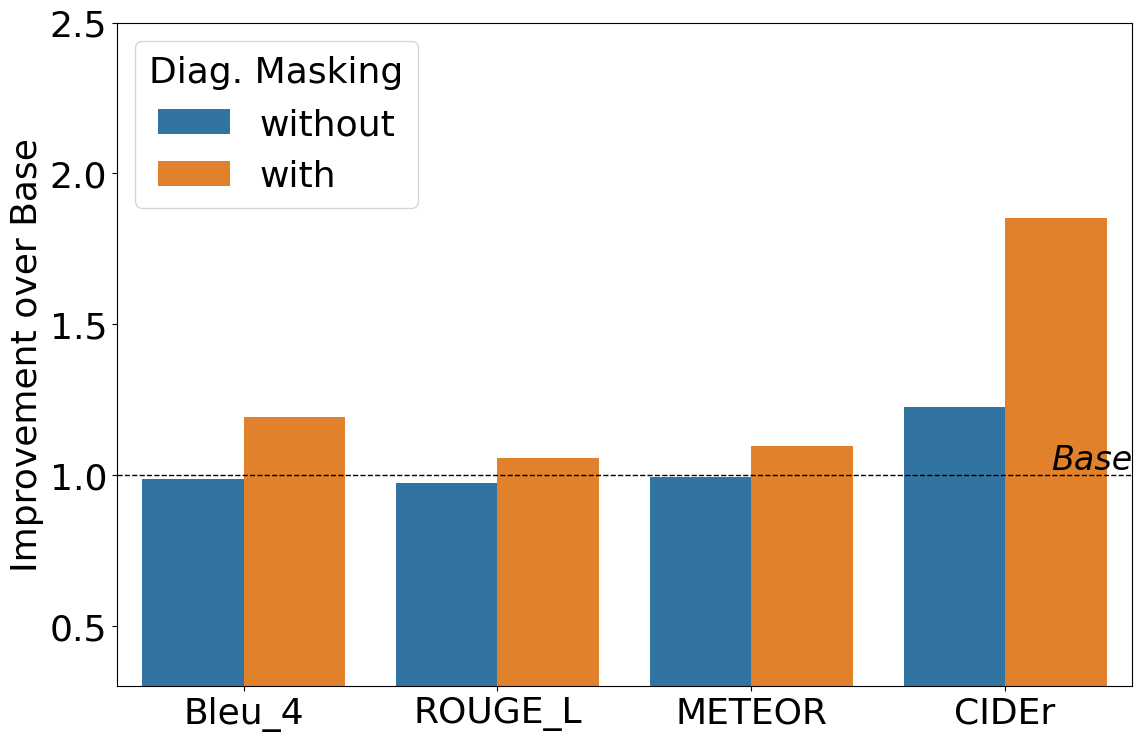

In [4]:
# Fetch runs from the specified project
runs_data = api.runs(f"{entity_name}/{project_name}")
import matplotlib.ticker as ticker

# Prepare a list to hold processed data
data = []
log = {}

# Iterate over runs to process configurations
for run in runs_data:
    # Fetch configurations
    player_embedding = run.config.get("player_embedding", None)
    use_random_embeddings = run.config.get("use_random_embeddings", False)
    use_BBX_features = run.config.get("use_BBX_features", False)
    player_embedding_order = run.config.get("player_embedding_order", None) 
    visual_use_diagonal_masking = run.config.get("visual_use_diagonal_masking", None) 
    # Fetching additional metrics
    cider_score = run.summary.get("CIDEr", None)
    bleu_4_score = run.summary.get("Bleu_4", None)
    rouge_l_score = run.summary.get("ROUGE_L", None)
    meteor_score = run.summary.get("METEOR", None)
    
    # Check if use_random_embeddings is True and update player_embedding accordingly
    if use_random_embeddings:
        player_embedding = "RANDOM"
    
    if player_embedding == "Rand":
        player_embedding = "RANDOM"
    
    
    # Your existing filter conditions
    if cider_score is not None and player_embedding_order is not None and player_embedding_order != "BC" and player_embedding_order != "lineup-ordered":
        identifier = f"{player_embedding}_bbx_{use_BBX_features}_{player_embedding_order}_diag_{visual_use_diagonal_masking}"
        if log.get(identifier, False):
            # Only one run per configuration
            print(f"Duplicate configuration: {identifier}")
            continue
        log[identifier] = True
        data.append({
            "id": run.id,
            "player_embedding": player_embedding,
            "use_random_embeddings": use_random_embeddings,
            "use_BBX_features": use_BBX_features,
            "player_embedding_order": player_embedding_order,
            "visual_use_diagonal_masking": visual_use_diagonal_masking,
            "Bleu_4": bleu_4_score,
            "ROUGE_L": rouge_l_score,
            "METEOR": meteor_score,
            "CIDEr": cider_score,
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Calculate max scores for each combination
max_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].max().reset_index()

# Pivot for easy access in plotting
pivot_max_scores = pd.pivot_table(max_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)

# Calculate the averages grouped by 'use_BBX_features'
metrics = ['Bleu_4', 'ROUGE_L', 'METEOR', 'CIDEr']
avg_scores = df.groupby('visual_use_diagonal_masking')[metrics].mean().reset_index()

for metric in metrics:
    avg_scores[metric] = avg_scores[metric] / base_scores[metric]

# Melt the DataFrame for plotting
melted_df = avg_scores.melt(id_vars=['visual_use_diagonal_masking'], value_vars=metrics,
                            var_name='Metric', value_name='Normalized Average Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Normalized Average Score', hue='visual_use_diagonal_masking', data=melted_df)
plt.ylabel('Normalized Average Score')
plt.xlabel("")
plt.ylabel("")
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['with' if label == 'True' else 'without' for label in labels]
plt.legend(handles, new_labels, loc='upper left', title="Diag. Masking")
plt.ylim(0.3,2.5)
plt.axhline(y=1, color='black', linewidth=1, linestyle='--')
plt.text(3.5, 1.05, "Base", va='center', ha='right', color='black', fontsize=font_size-2, style='italic')
plt.ylabel('Improvement over Base')

# Plot with adjusted y-axis limits to focus on a specific range
# Set y-axis to show a tick every 0.5
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Format y-axis tick labels to show no decimal places
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.tight_layout()
plt.show()

Duplicate configuration: CLIP_bbx_True_possession_diag_False
Duplicate configuration: CLIP_bbx_False_possession_diag_False
Duplicate configuration: CLIP_bbx_False_possession_diag_True
Duplicate configuration: CLIP_bbx_True_possession_diag_True
Number of unique configurations: 12
Log of configurations: {'CLIP_bbx_True_possession_diag_False': True, 'CLIP_bbx_True_possession_diag_True': True, 'CLIP_bbx_False_possession_diag_False': True, 'CLIP_bbx_False_possession_diag_True': True, 'RANDOM_bbx_True_possession_diag_False': True, 'RANDOM_bbx_False_possession_diag_False': True, 'RANDOM_bbx_False_possession_diag_True': True, 'RANDOM_bbx_True_possession_diag_True': True, 'BERT_bbx_False_possession_diag_False': True, 'BERT_bbx_True_possession_diag_False': True, 'BERT_bbx_False_possession_diag_True': True, 'BERT_bbx_True_possession_diag_True': True}


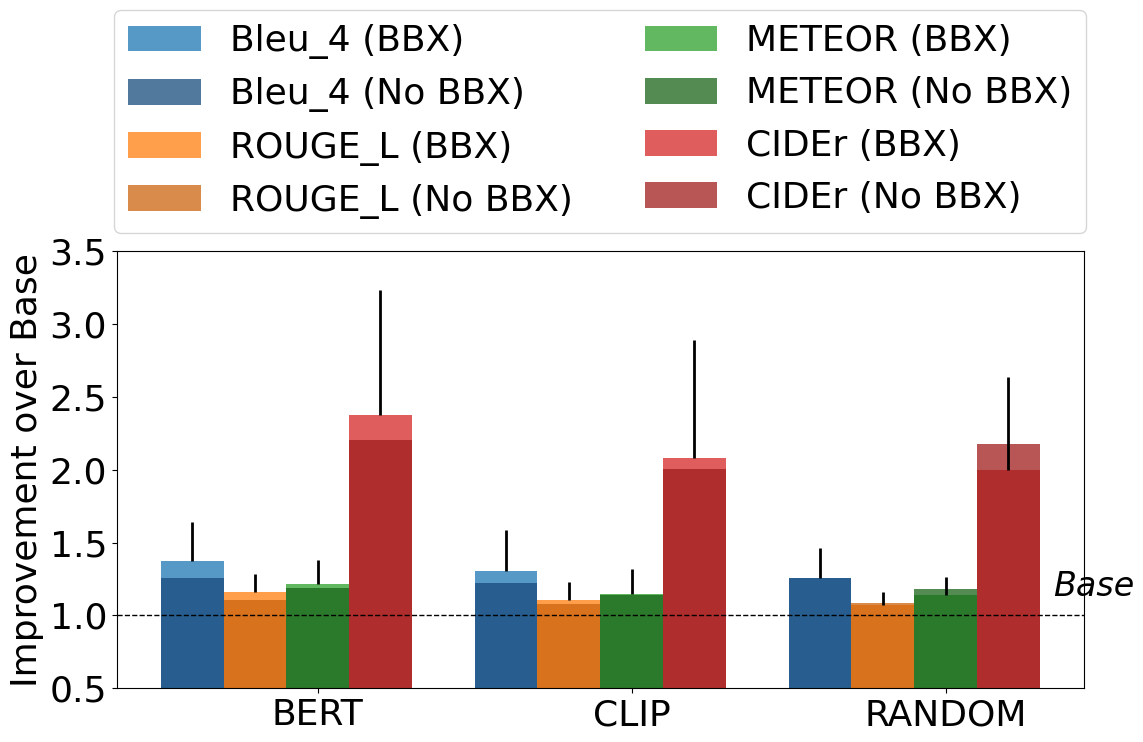

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare a list to hold processed data
data = []

log = {}

# Iterate over runs to process configurations
for run in runs_data:
    # Fetch configurations
    player_embedding = run.config.get("player_embedding", None)
    use_random_embeddings = run.config.get("use_random_embeddings", False)
    use_BBX_features = run.config.get("use_BBX_features", False)
    player_embedding_order = run.config.get("player_embedding_order", None) 
    visual_use_diagonal_masking = run.config.get("visual_use_diagonal_masking", None) 
    # Fetching additional metrics
    cider_score = run.summary.get("CIDEr", None)
    bleu_4_score = run.summary.get("Bleu_4", None)
    rouge_l_score = run.summary.get("ROUGE_L", None)
    meteor_score = run.summary.get("METEOR", None)
    
    # Check if use_random_embeddings is True and update player_embedding accordingly
    if use_random_embeddings:
        player_embedding = "RANDOM"
    
    if player_embedding == "Rand":
        player_embedding = "RANDOM"
    
    
    # Your existing filter conditions
    if cider_score is not None and player_embedding_order is not None and player_embedding_order != "BC" and player_embedding_order != "lineup-ordered" and player_embedding_order != "lineup" and player_embedding != None and player_embedding != "BERT-Stat":
        identifier = f"{player_embedding}_bbx_{use_BBX_features}_{player_embedding_order}_diag_{visual_use_diagonal_masking}"
        if log.get(identifier, False):
            # Only one run per configuration
            print(f"Duplicate configuration: {identifier}")
            continue
        log[identifier] = True
    
        data.append({
            "id": run.id,
            "player_embedding": player_embedding,
            "use_random_embeddings": use_random_embeddings,
            "use_BBX_features": use_BBX_features,
            "player_embedding_order": player_embedding_order,
            "visual_use_diagonal_masking": visual_use_diagonal_masking,
            "Bleu_4": bleu_4_score,
            "ROUGE_L": rouge_l_score,
            "METEOR": meteor_score,
            "CIDEr": cider_score,
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)
print("Number of unique configurations:", len(df))

# Assuming 'df' and 'metrics' are already defined
# Example metrics list for clarity
metrics = ['Bleu_4', 'ROUGE_L', 'METEOR', 'CIDEr']

# Calculate max scores for each combination
max_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].max().reset_index()
min_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].min().reset_index()


# Calculate averages grouped by 'player_embedding' AND 'use_BBX_features'
grouped_avg_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].mean().reset_index()

for metric in metrics:
    grouped_avg_scores[metric] = grouped_avg_scores[metric]  / base_scores[metric]
    max_scores[metric] = max_scores[metric]  / base_scores[metric]
    min_scores[metric] = min_scores[metric]  / base_scores[metric]


# Pivot for easy access in plotting
pivot_max_scores = pd.pivot_table(max_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)
pivot_min_scores = pd.pivot_table(min_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)
# Create a pivot table for plotting. This corrects for the potential KeyError
pivot_df = pd.pivot_table(grouped_avg_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)

# Setup for plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 1.0
num_metrics = len(metrics)
index = np.arange(len(pivot_df)) * (num_metrics + 1)

# Define a color palette for BBX and no BBX. Adjust the colors as needed.
# Colors for BBX data
colors_bbx = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

# Darker versions for non-BBX data
colors_no_bbx = ['#174b7d', '#cc640d', '#196419', '#a11d1d']  # darker blue, darker orange, darker green, darker red


for i, metric in enumerate(metrics):
    yes_values = pivot_df[(metric, True)] if (metric, True) in pivot_df.columns else [0] * len(pivot_df)
    no_values = pivot_df[(metric, False)] if (metric, False) in pivot_df.columns else [0] * len(pivot_df)
    
    ax.bar(index + i * bar_width, yes_values, bar_width,  label=f'{metric} (BBX)', alpha=0.75, color=colors_bbx[i])
    ax.bar(index + i * bar_width, no_values, bar_width, label=f'{metric} (No BBX)', alpha=0.75, color=colors_no_bbx[i])
    
    yes_max = pivot_max_scores[(metric, True)].values if (metric, True) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    no_max = pivot_max_scores[(metric, False)].values if (metric, False) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    
    yes_min = pivot_min_scores[(metric, True)].values if (metric, True) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    no_min = pivot_min_scores[(metric, False)].values if (metric, False) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    
    # Calculate the errors for yes_values and no_values separately
    yes_errors = yes_max - yes_values
    no_errors = no_max - no_values
    
    yes_errors_min = yes_values - yes_min
    no_errors_min = no_values - no_min
    
    # Plot error bars for each bar
    for j, (yes_val, no_val) in enumerate(zip(yes_values, no_values)):
        # ax.errorbar(index[j] + i * bar_width, yes_val, yerr=[[yes_errors_min[j]], [np.abs(yes_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)
        ax.errorbar(index[j] + i * bar_width, yes_val, yerr=[[0], [np.abs(yes_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)
        # ax.errorbar(index[j] + i * bar_width, no_val, yerr=[[no_errors_min[j]], [np.abs(no_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)

# Setting x-axis ticks and labels
ax.set_xticks(index + num_metrics * bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.axhline(y=1, color='black', linewidth=1, linestyle='--')
ax.text(15, 1.2, "Base", va='center', ha='right', color='black', fontsize=font_size-2, style='italic')


# Legend and labels
ax.legend(loc='lower center', ncols=2, bbox_to_anchor=(0.5,1))
plt.ylabel('Improvement over Base')
plt.ylim(0.5,3.5)
plt.tight_layout()
print("Log of configurations:", log)
plt.show()

Number of unique configurations: 19
Log of configurations: {'CLIP_bbx_True_lineup_diag_False': True, 'CLIP_bbx_True_lineup_diag_True': True, 'RANDOM_bbx_True_lineup_diag_True': True, 'RANDOM_bbx_True_lineup_diag_False': True, 'CLIP_bbx_False_lineup_diag_False': True, 'CLIP_bbx_False_lineup_diag_True': True, 'BERT_bbx_False_lineup_diag_False': True, 'BERT_bbx_False_lineup_diag_True': True, 'BERT_bbx_True_lineup_diag_True': True, 'BERT_bbx_True_lineup_diag_False': True, 'RANDOM_bbx_False_lineup_diag_False': True, 'RANDOM_bbx_False_lineup_diag_True': True}


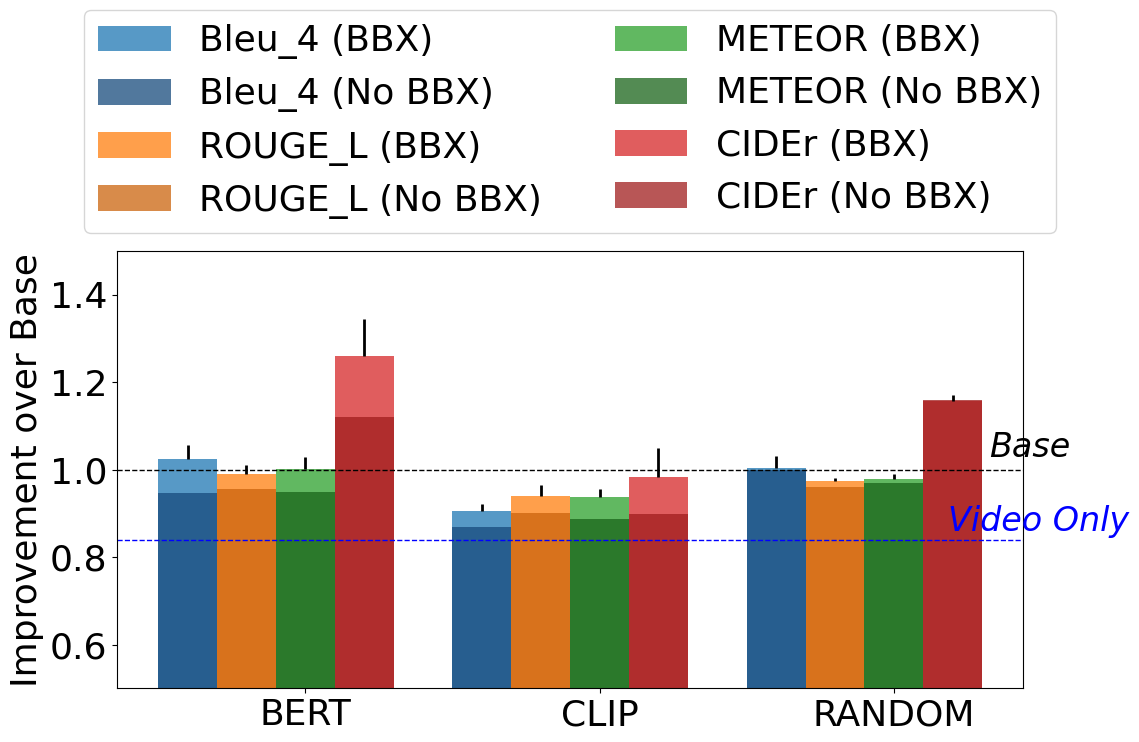

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare a list to hold processed data
data = []
log = {}

# Iterate over runs to process configurations
for run in runs_data:
    # Fetch configurations
    player_embedding = run.config.get("player_embedding", None)
    use_random_embeddings = run.config.get("use_random_embeddings", False)
    use_BBX_features = run.config.get("use_BBX_features", False)
    player_embedding_order = run.config.get("player_embedding_order", None) 
    visual_use_diagonal_masking = run.config.get("visual_use_diagonal_masking", None) 
    # Fetching additional metrics
    cider_score = run.summary.get("CIDEr", None)
    bleu_4_score = run.summary.get("Bleu_4", None)
    rouge_l_score = run.summary.get("ROUGE_L", None)
    meteor_score = run.summary.get("METEOR", None)
    
    # Check if use_random_embeddings is True and update player_embedding accordingly
    if use_random_embeddings:
        player_embedding = "RANDOM"
    
    if player_embedding == "Rand":
        player_embedding = "RANDOM"
    
    
    # Your existing filter conditions
    if cider_score is not None and player_embedding_order is not None and player_embedding_order=="lineup" and player_embedding != None and player_embedding != "BERT-Stat":
        identifier = f"{player_embedding}_bbx_{use_BBX_features}_{player_embedding_order}_diag_{visual_use_diagonal_masking}"
        # if log.get(identifier, False):
        #     # Only one run per configuration
        #     print(f"Duplicate configuration: {identifier}")
        #     continue
        log[identifier] = True
        data.append({
            "id": run.id,
            "player_embedding": player_embedding,
            "use_random_embeddings": use_random_embeddings,
            "use_BBX_features": use_BBX_features,
            "player_embedding_order": player_embedding_order,
            "visual_use_diagonal_masking": visual_use_diagonal_masking,
            "Bleu_4": bleu_4_score,
            "ROUGE_L": rouge_l_score,
            "METEOR": meteor_score,
            "CIDEr": cider_score,
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Assuming 'df' and 'metrics' are already defined
# Example metrics list for clarity
metrics = ['Bleu_4', 'ROUGE_L', 'METEOR', 'CIDEr']

# Calculate max scores for each combination
max_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].max().reset_index()
min_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].min().reset_index()


# Calculate averages grouped by 'player_embedding' AND 'use_BBX_features'
grouped_avg_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].mean().reset_index()

for metric in metrics:
    grouped_avg_scores[metric] = grouped_avg_scores[metric]  / base_scores[metric]
    max_scores[metric] = max_scores[metric]  / base_scores[metric]
    min_scores[metric] = min_scores[metric]  / base_scores[metric]
    video_improvement = video_base_scores[metric] / base_scores[metric]


# Pivot for easy access in plotting
pivot_max_scores = pd.pivot_table(max_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)
pivot_min_scores = pd.pivot_table(min_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)
# Create a pivot table for plotting. This corrects for the potential KeyError
pivot_df = pd.pivot_table(grouped_avg_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)

# Setup for plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 1.0
num_metrics = len(metrics)
index = np.arange(len(pivot_df)) * (num_metrics + 1)

# Define a color palette for BBX and no BBX. Adjust the colors as needed.
# Colors for BBX data
colors_bbx = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

# Darker versions for non-BBX data
colors_no_bbx = ['#174b7d', '#cc640d', '#196419', '#a11d1d']  # darker blue, darker orange, darker green, darker red


for i, metric in enumerate(metrics):
    yes_values = pivot_df[(metric, True)] if (metric, True) in pivot_df.columns else [0] * len(pivot_df)
    no_values = pivot_df[(metric, False)] if (metric, False) in pivot_df.columns else [0] * len(pivot_df)
    
    ax.bar(index + i * bar_width, yes_values, bar_width,  label=f'{metric} (BBX)', alpha=0.75, color=colors_bbx[i])
    ax.bar(index + i * bar_width, no_values, bar_width, label=f'{metric} (No BBX)', alpha=0.75, color=colors_no_bbx[i])
    
    yes_max = pivot_max_scores[(metric, True)].values if (metric, True) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    no_max = pivot_max_scores[(metric, False)].values if (metric, False) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    
    yes_min = pivot_min_scores[(metric, True)].values if (metric, True) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    no_min = pivot_min_scores[(metric, False)].values if (metric, False) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    
    # Calculate the errors for yes_values and no_values separately
    yes_errors = yes_max - yes_values
    no_errors = no_max - no_values
    
    yes_errors_min = yes_values - yes_min
    no_errors_min = no_values - no_min
    
    # Plot error bars for each bar
    for j, (yes_val, no_val) in enumerate(zip(yes_values, no_values)):
        # ax.errorbar(index[j] + i * bar_width, yes_val, yerr=[[yes_errors_min[j]], [np.abs(yes_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)
        ax.errorbar(index[j] + i * bar_width, yes_val, yerr=[[0], [np.abs(yes_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)
        # ax.errorbar(index[j] + i * bar_width, no_val, yerr=[[no_errors_min[j]], [np.abs(no_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)

# Setting x-axis ticks and labels
ax.set_xticks(index + num_metrics * bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.axhline(y=1, color='black', linewidth=1, linestyle='--')
ax.text(15, 1.05, "Base", va='center', ha='right', color='black', fontsize=font_size-2, style='italic')
ax.axhline(y=video_improvement, color='blue', linewidth=1, linestyle='--')
ax.text(16, 1.05*video_improvement, "Video Only", va='center', ha='right', color='blue', fontsize=font_size-2, style='italic')


# Legend and labels
ax.legend(loc='lower center', ncols=2, bbox_to_anchor=(0.5,1))
plt.ylabel('Improvement over Base')
plt.ylim(0.5,1.5)

plt.tight_layout()
print("Number of unique configurations:", len(df))
print("Log of configurations:", log)
plt.show()

Duplicate configuration: CLIP_bbx_False_possession_diag_True
Duplicate configuration: CLIP_bbx_False_possession_diag_True
Duplicate configuration: CLIP_bbx_True_possession_diag_True
Duplicate configuration: BERT_bbx_False_possession_diag_False
Duplicate configuration: BERT_bbx_True_possession_diag_False
Duplicate configuration: BERT_bbx_True_possession_diag_True
Duplicate configuration: BERT_bbx_False_possession_diag_True
Number of unique configurations: 24
Log of configurations: {'RANDOM_bbx_True_possession_diag_False': True, 'CLIP_bbx_False_possession_diag_True': True, 'RANDOM_bbx_True_lineup_diag_False': True, 'RANDOM_bbx_True_possession_diag_True': True, 'RANDOM_bbx_True_lineup_diag_True': True, 'RANDOM_bbx_False_possession_diag_False': True, 'RANDOM_bbx_False_lineup_diag_False': True, 'RANDOM_bbx_False_possession_diag_True': True, 'RANDOM_bbx_False_lineup_diag_True': True, 'BERT_bbx_True_possession_diag_False': True, 'BERT_bbx_True_lineup_diag_False': True, 'BERT_bbx_True_possessi

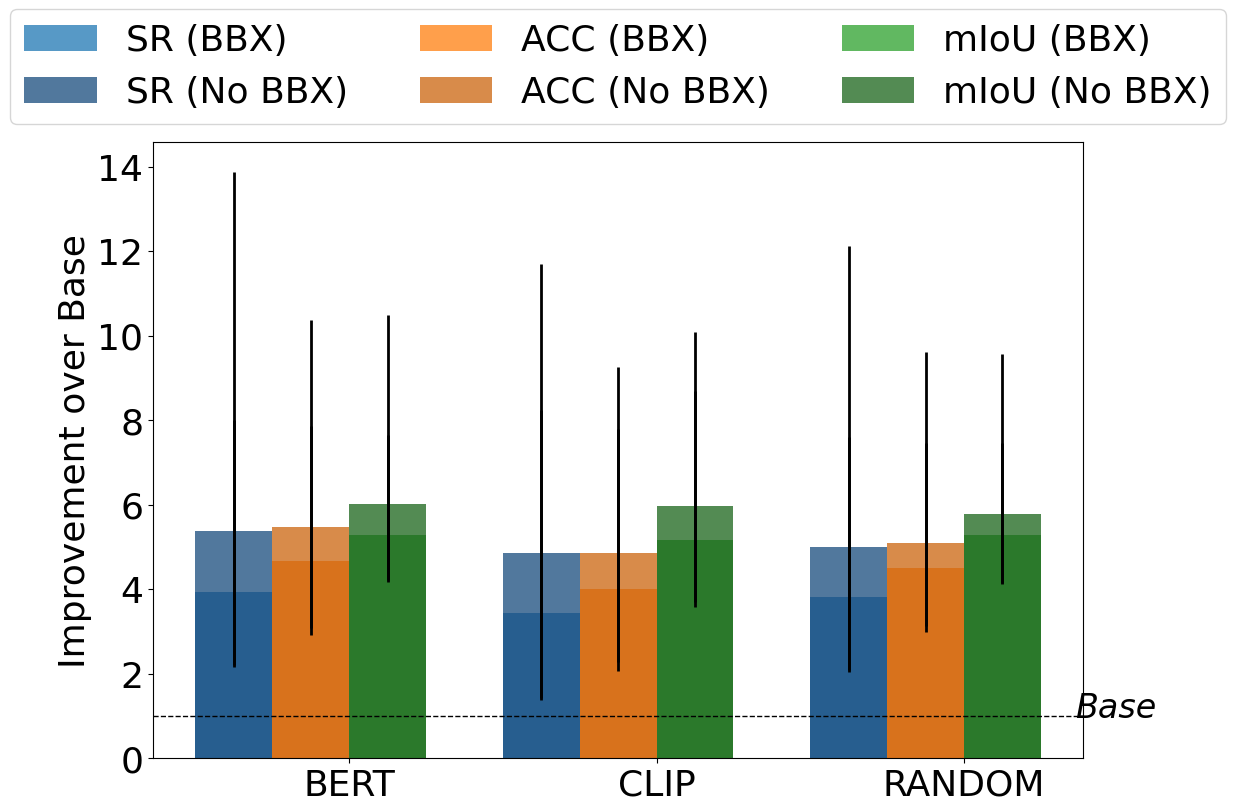

<Figure size 1200x800 with 0 Axes>

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

base_player_scores = {
    "ACC":0.0697,
    "SR":0.0463,
    "mIoU":0.0686,
}

# Prepare a list to hold processed data
data = []
log = {}
# Iterate over runs to process configurations
for run in runs_data:
    # Fetch configurations
    player_embedding = run.config.get("player_embedding", None)
    use_random_embeddings = run.config.get("use_random_embeddings", False)
    use_BBX_features = run.config.get("use_BBX_features", False)
    player_embedding_order = run.config.get("player_embedding_order", None) 
    visual_use_diagonal_masking = run.config.get("visual_use_diagonal_masking", None) 
    # Fetching additional metrics
    acc = run.summary.get("ACC", None)
    sr = run.summary.get("SR", None)
    mIoU = run.summary.get("mIoU", None)
    action_type = run.config.get("action_type", None)
    
    
    
    # Check if use_random_embeddings is True and update player_embedding accordingly
    if use_random_embeddings:
        player_embedding = "RANDOM"
    
    if player_embedding == "Rand":
        player_embedding = "RANDOM"
    
    
    # Your existing filter conditions
    if acc is not None and player_embedding_order is not None and player_embedding_order != "BC"  and player_embedding_order != "lineup-ordered" and action_type == None:
        identifier = f"{player_embedding}_bbx_{use_BBX_features}_{player_embedding_order}_diag_{visual_use_diagonal_masking}"
        if log.get(identifier, False):
            # Only one run per configuration
            print(f"Duplicate configuration: {identifier}")
            continue
        log[identifier] = True
        data.append({
            "id": run.id,
            "player_embedding": player_embedding,
            "use_random_embeddings": use_random_embeddings,
            "use_BBX_features": use_BBX_features,
            "player_embedding_order": player_embedding_order,
            "visual_use_diagonal_masking": visual_use_diagonal_masking,
            "SR": sr,
            "ACC": acc,
            "mIoU": mIoU,
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)
# Assuming 'df' and 'metrics' are already defined
# Example metrics list for clarity
metrics = ['SR','ACC',  'mIoU']

# Calculate max scores for each combination
max_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].max().reset_index()
min_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].min().reset_index()


# Calculate averages grouped by 'player_embedding' AND 'use_BBX_features'
grouped_avg_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].mean().reset_index()

for metric in metrics:
    grouped_avg_scores[metric] = grouped_avg_scores[metric]  / base_player_scores[metric]
    max_scores[metric] = max_scores[metric]  / base_player_scores[metric]
    min_scores[metric] = min_scores[metric]  / base_player_scores[metric]

# Pivot for easy access in plotting
pivot_max_scores = pd.pivot_table(max_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)
pivot_min_scores = pd.pivot_table(min_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)

# Create a pivot table for plotting. This corrects for the potential KeyError
pivot_df = pd.pivot_table(grouped_avg_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)

# Setup for plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 1.0
num_metrics = len(metrics)
index = np.arange(len(pivot_df)) * (num_metrics + 1)

# Define a color palette for BBX and no BBX. Adjust the colors as needed.
# Colors for BBX data
colors_bbx = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

# Darker versions for non-BBX data
colors_no_bbx = ['#174b7d', '#cc640d', '#196419', '#a11d1d']  # darker blue, darker orange, darker green, darker red


for i, metric in enumerate(metrics):
    yes_values = pivot_df[(metric, True)] if (metric, True) in pivot_df.columns else [0] * len(pivot_df)
    no_values = pivot_df[(metric, False)] if (metric, False) in pivot_df.columns else [0] * len(pivot_df)
    
    ax.bar(index + i * bar_width, yes_values, bar_width, label=f'{metric} (BBX)', alpha=0.75, color=colors_bbx[i])
    ax.bar(index + i * bar_width, no_values, bar_width, label=f'{metric} (No BBX)', alpha=0.75, color=colors_no_bbx[i])
    
    yes_max = pivot_max_scores[(metric, True)].values if (metric, True) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    no_max = pivot_max_scores[(metric, False)].values if (metric, False) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    
    yes_min = pivot_min_scores[(metric, True)].values if (metric, True) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    no_min = pivot_min_scores[(metric, False)].values if (metric, False) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    
    # Calculate the errors for yes_values and no_values separately
    yes_errors = yes_max - yes_values
    no_errors = no_max - no_values
    yes_errors_min = yes_values - yes_min
    no_errors_min = no_values - no_min
    
    # Plot error bars for each bar
    for j, (yes_val, no_val) in enumerate(zip(yes_values, no_values)):
        ax.errorbar(index[j] + i * bar_width, yes_val, yerr=[[yes_errors_min[j]], [np.abs(yes_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)
        ax.errorbar(index[j] + i * bar_width, no_val, yerr=[[no_errors_min[j]], [np.abs(no_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)

# Setting x-axis ticks and labels
ax.set_xticks(index + num_metrics * bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.axhline(y=1, color='black', linewidth=1, linestyle='--')
ax.text(12, 1.2, "Base", va='center', ha='right', color='black', fontsize=font_size-2, style='italic')


# Legend and labels
ax.legend(loc='lower center', ncols=3, bbox_to_anchor=(0.5,1))
plt.ylabel('Improvement over Base')

plt.figure(figsize=(12, 8))
plt.tight_layout()
print("Number of unique configurations:", len(df))
print("Log of configurations:", log)
plt.show()


Duplicate configuration: CLIP_bbx_True_possession_diag_False_level_2
Duplicate configuration: CLIP_bbx_True_possession_diag_True_level_2


Number of unique configurations: 24
Log of configurations: {'BERT_bbx_False_possession_diag_False_level_2': True, 'RANDOM_bbx_False_possession_diag_False_level_2': True, 'RANDOM_bbx_False_possession_diag_True_level_2': True, 'BERT_bbx_False_possession_diag_True_level_2': True, 'BERT_bbx_True_possession_diag_False_level_2': True, 'RANDOM_bbx_True_possession_diag_False_level_2': True, 'RANDOM_bbx_True_possession_diag_True_level_2': True, 'BERT_bbx_True_possession_diag_True_level_2': True, 'RANDOM_bbx_False_lineup_diag_False_level_2': True, 'BERT_bbx_False_lineup_diag_False_level_2': True, 'RANDOM_bbx_False_lineup_diag_True_level_2': True, 'BERT_bbx_False_lineup_diag_True_level_2': True, 'RANDOM_bbx_True_lineup_diag_False_level_2': True, 'BERT_bbx_True_lineup_diag_False_level_2': True, 'RANDOM_bbx_True_lineup_diag_True_level_2': True, 'BERT_bbx_True_lineup_diag_True_level_2': True, 'CLIP_bbx_True_possession_diag_False_level_2': True, 'CLIP_bbx_False_possession_diag_False_level_2': True, '

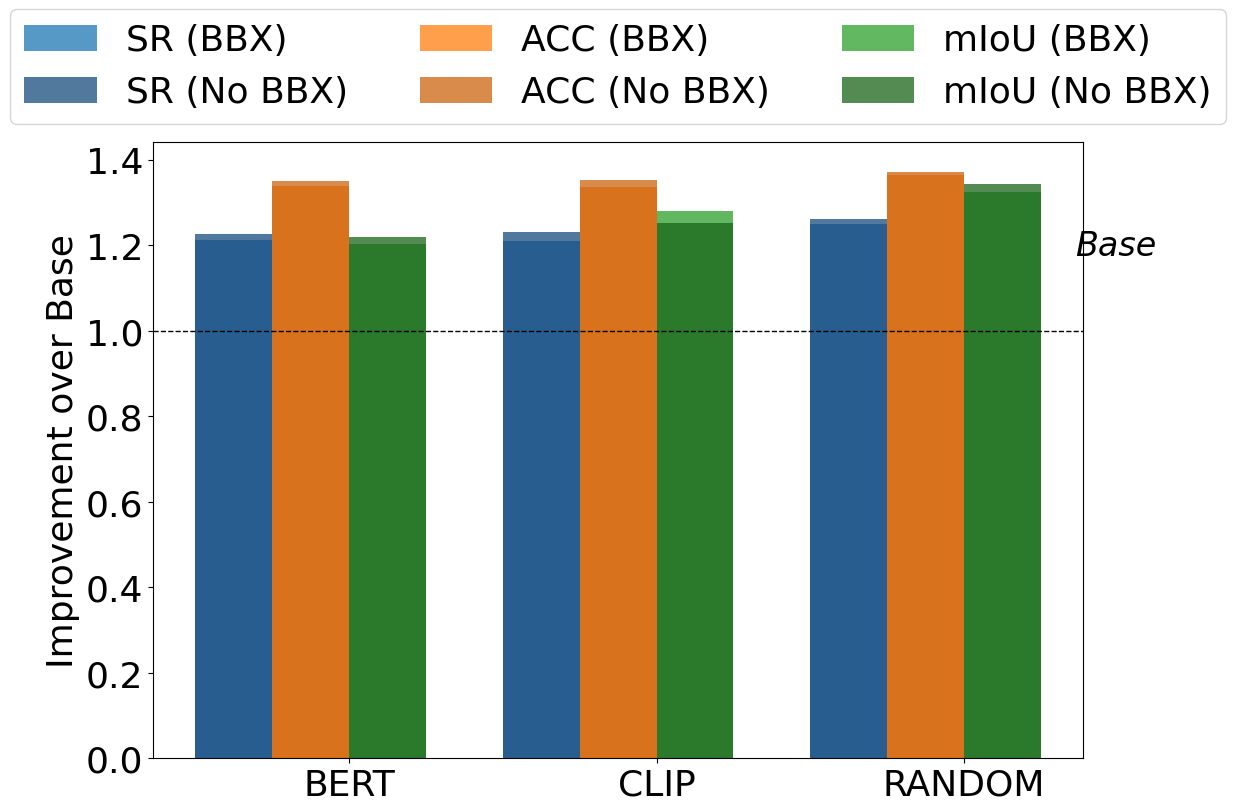

<Figure size 1200x800 with 0 Axes>

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

current_action_level = 2

base_action_scores = {
    0:{"ACC":0.4234,
    "SR":0.3767,
    "mIoU":0.4645
    },
    1:{"ACC":0.5125,
       "SR": 0.4688,
       "mIoU":0.5708
    },
    2:{"ACC":0.6120,
       "SR": 0.6014,
       "mIoU":0.6661
    }
}

# Prepare a list to hold processed data
data = []
log = {}
# Iterate over runs to process configurations
for run in runs_data:
    # Fetch configurations
    player_embedding = run.config.get("player_embedding", None)
    use_random_embeddings = run.config.get("use_random_embeddings", False)
    use_BBX_features = run.config.get("use_BBX_features", False)
    player_embedding_order = run.config.get("player_embedding_order", None) 
    visual_use_diagonal_masking = run.config.get("visual_use_diagonal_masking", None) 
    # Fetching additional metrics
    acc = run.summary.get("Action_ACC", None)
    sr = run.summary.get("Action_SR", None)
    mIoU = run.summary.get("Action_mIoU", None)
    acc_action = run.summary.get("Action1_ACC", None)
    sr_action = run.summary.get("Action1_SR", None)
    mIoU_action = run.summary.get("Action1_mIoU", None)
    action_level = run.config.get("action_level", None)
    
    if acc is None:
        acc = acc_action
        sr = sr_action
        mIoU = mIoU_action
    
    # Check if use_random_embeddings is True and update player_embedding accordingly
    if use_random_embeddings:
        player_embedding = "RANDOM"
    
    if player_embedding == "Rand":
        player_embedding = "RANDOM"
    
    
    # Your existing filter conditions
    if acc is not None and player_embedding_order is not None and player_embedding_order != "BC"  and player_embedding_order != "lineup-ordered" and player_embedding != None and action_level == current_action_level:
        identifier = f"{player_embedding}_bbx_{use_BBX_features}_{player_embedding_order}_diag_{visual_use_diagonal_masking}_level_{action_level}"
        if log.get(identifier, False):
            # Only one run per configuration
            print(f"Duplicate configuration: {identifier}")
            continue
        log[identifier] = True
        data.append({
            "id": run.id,
            "player_embedding": player_embedding,
            "use_random_embeddings": use_random_embeddings,
            "use_BBX_features": use_BBX_features,
            "player_embedding_order": player_embedding_order,
            "visual_use_diagonal_masking": visual_use_diagonal_masking,
            "SR": sr,
            "ACC": acc,
            "mIoU": mIoU,
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)
# Assuming 'df' and 'metrics' are already defined
# Example metrics list for clarity
metrics = ['SR','ACC',  'mIoU']

# Calculate max scores for each combination
max_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].max().reset_index()
min_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].min().reset_index()


# Calculate averages grouped by 'player_embedding' AND 'use_BBX_features'
grouped_avg_scores = df.groupby(['player_embedding', 'use_BBX_features'])[metrics].mean().reset_index()

for metric in metrics:
    grouped_avg_scores[metric] = grouped_avg_scores[metric]  / base_action_scores[current_action_level][metric]
    max_scores[metric] = max_scores[metric]  / base_action_scores[current_action_level][metric]
    min_scores[metric] = min_scores[metric]  / base_action_scores[current_action_level][metric]


# Pivot for easy access in plotting
pivot_max_scores = pd.pivot_table(max_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)
pivot_min_scores = pd.pivot_table(min_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)
# Create a pivot table for plotting. This corrects for the potential KeyError
pivot_df = pd.pivot_table(grouped_avg_scores, index='player_embedding', columns='use_BBX_features', values=metrics, fill_value=0)

# Setup for plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 1.0
num_metrics = len(metrics)
index = np.arange(len(pivot_df)) * (num_metrics + 1)

# Define a color palette for BBX and no BBX. Adjust the colors as needed.
# Colors for BBX data
colors_bbx = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

# Darker versions for non-BBX data
colors_no_bbx = ['#174b7d', '#cc640d', '#196419', '#a11d1d']  # darker blue, darker orange, darker green, darker red


for i, metric in enumerate(metrics):
    yes_values = pivot_df[(metric, True)] if (metric, True) in pivot_df.columns else [0] * len(pivot_df)
    no_values = pivot_df[(metric, False)] if (metric, False) in pivot_df.columns else [0] * len(pivot_df)
    
    ax.bar(index + i * bar_width, yes_values, bar_width, label=f'{metric} (BBX)', alpha=0.75, color=colors_bbx[i])
    ax.bar(index + i * bar_width, no_values, bar_width, label=f'{metric} (No BBX)', alpha=0.75, color=colors_no_bbx[i])
    
    yes_max = pivot_max_scores[(metric, True)].values if (metric, True) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    no_max = pivot_max_scores[(metric, False)].values if (metric, False) in pivot_max_scores.columns else np.zeros(len(pivot_max_scores))
    
    yes_min = pivot_min_scores[(metric, True)].values if (metric, True) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    no_min = pivot_min_scores[(metric, False)].values if (metric, False) in pivot_min_scores.columns else np.zeros(len(pivot_min_scores))
    
    # Calculate the errors for yes_values and no_values separately
    yes_errors = yes_max - yes_values
    no_errors = no_max - no_values
    yes_errors_min = yes_values - yes_min
    no_errors_min = no_values - no_min
    
    # Plot error bars for each bar
    # for j, (yes_val, no_val) in enumerate(zip(yes_values, no_values)):
    #     ax.errorbar(index[j] + i * bar_width, yes_val, yerr=[[yes_errors_min[j]], [np.abs(yes_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)
    #     ax.errorbar(index[j] + i * bar_width, no_val, yerr=[[no_errors_min[j]], [np.abs(no_errors[j])]], fmt='none', capsize=0, ecolor='k', elinewidth=2)

# Setting x-axis ticks and labels
ax.set_xticks(index + num_metrics * bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.axhline(y=1, color='black', linewidth=1, linestyle='--')
ax.text(12, 1.2, "Base", va='center', ha='right', color='black', fontsize=font_size-2, style='italic')


# Legend and labels
ax.legend(loc='lower center', ncols=3, bbox_to_anchor=(0.5,1))
plt.ylabel('Improvement over Base')

plt.figure(figsize=(12, 8))
plt.tight_layout()
print("Number of unique configurations:", len(df))
print("Log of configurations:", log)
plt.show()

In [9]:
import pandas as pd
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 100)  # Example: Set to display up to 100 rows
pd.set_option('display.max_columns', 20)  # Example: Set to display up to 20 columns


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

current_action_level = 0

base_action_scores = {
    0:{"ACC":0.4234,
    "SR":0.3767,
    "mIoU":0.4645
    },
    1:{"ACC":0.5125,
       "SR": 0.4688,
       "mIoU":0.5708
    },
    2:{"ACC":0.6120,
       "SR": 0.6014,
       "mIoU":0.6661
    }
}

# Prepare a list to hold processed data
data = []
log = {}
# Iterate over runs to process configurations
for run in runs_data:
    # Fetch configurations
    player_embedding = run.config.get("player_embedding", None)
    use_random_embeddings = run.config.get("use_random_embeddings", False)
    use_BBX_features = run.config.get("use_BBX_features", False)
    player_embedding_order = run.config.get("player_embedding_order", None) 
    visual_use_diagonal_masking = run.config.get("visual_use_diagonal_masking", None) 
    # Fetching additional metrics
    acc = run.summary.get("Action_ACC", None)
    sr = run.summary.get("Action_SR", None)
    mIoU = run.summary.get("Action_mIoU", None)
    acc_action = run.summary.get("Action1_ACC", None)
    sr_action = run.summary.get("Action1_SR", None)
    mIoU_action = run.summary.get("Action1_mIoU", None)
    action_level = run.config.get("action_level", None)
    
    if acc is None:
        acc = acc_action
        sr = sr_action
        mIoU = mIoU_action
    
    # Check if use_random_embeddings is True and update player_embedding accordingly
    if use_random_embeddings:
        player_embedding = "RANDOM"
    
    if player_embedding == "Rand":
        player_embedding = "RANDOM"
    
    
    # Your existing filter conditions
    if acc is not None and player_embedding_order is not None and player_embedding_order != "BC"  and player_embedding_order != "lineup-ordered" and player_embedding != None:
        identifier = f"{player_embedding}_bbx_{use_BBX_features}_{player_embedding_order}_diag_{visual_use_diagonal_masking}_level_{action_level}"
        # if log.get(identifier, False):
        #     # Only one run per configuration
        #     print(f"Duplicate configuration: {identifier}")
        #     continue
        # log[identifier] = True
        data.append({
            "id": "{}+{}+{}{}".format("Ours" if visual_use_diagonal_masking else "NSVA", player_embedding, player_embedding_order, "- BBX" if not use_BBX_features else ""),
            "player_embedding": player_embedding,
            "use_random_embeddings": use_random_embeddings,
            "use_BBX_features": use_BBX_features,
            "player_embedding_order": player_embedding_order,
            "visual_use_diagonal_masking": visual_use_diagonal_masking,
            "action_level": action_level,
            "SR": sr,
            "ACC": acc,
            "mIoU": mIoU,
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)
sorted_df = df.sort_values(by=['ACC', 'SR', 'mIoU'], ascending=[True, True, True])
sorted_df[sorted_df["action_level"] == 0].drop(columns=["use_random_embeddings", "use_BBX_features", "player_embedding_order", "visual_use_diagonal_masking","player_embedding"])

,id,action_level,SR,ACC,mIoU
6,NSVA+CLIP+possession,0,0.140688,0.241873,0.364984
13,NSVA+CLIP+lineup,0,0.224949,0.393391,0.512366
8,Ours+CLIP+possession,0,0.271255,0.451890,0.549084
5,NSVA+BERT+possession,0,0.278846,0.482034,0.610218
19,NSVA+RANDOM+possession,0,0.300607,0.510284,0.645779
78,NSVA+CLIP+possession,0,0.316802,0.510957,0.624257
16,Ours+BERT+lineup,0,0.324646,0.523927,0.620082
2,NSVA+CLIP+possession- BBX,0,0.322115,0.524452,0.640021
4,Ours+CLIP+possession- BBX,0,0.314777,0.530046,0.648557
91,Ours+CLIP+lineup- BBX,0,0.310729,0.530492,0.646105


In [10]:
Baseline + L & - & \ding{51} & - & - & 0.2185 & 0.4812 & 0.2286 & 1.110 \\
Diagonal + L & - & \ding{51} & - & - & 0.2290 & 0.4861 & 0.2326 & 1.226 \\
Diagonal + L & - & \ding{51} & - & \ding{51} & 0.2311 & 0.4936 & 0.2364 & 1.179 \\
Baseline + L & - & \ding{51} & - & \ding{51} & 0.2360 & 0.4992 & 0.2416 & 1.276 \\
\midrule
Baseline & - & - & - & \ding{51} & 0.2430 & 0.5080 & 0.2450 & 1.139 \\
Diagonal & - & - & - & \ding{51} & 0.2470 & 0.5130 & 0.2480 & 1.134 \\
\midrule
Baseline + L & - & - & \ding{51} & - & 0.2367 & 0.4916 & 0.2362 & 1.331 \\
Diagonal + L & \ding{51} & - & - & - & 0.2411 & 0.4992 & 0.2399 & 1.412 \\
Diagonal + L & - & - & \ding{51} & - & 0.2419 & 0.4989 & 0.2409 & 1.398 \\
Diagonal + L & - & \ding{51} & - & \ding{51} & 0.2441 & 0.5013 & 0.2415 & 1.336 \\
Diagonal + L & \ding{51} & - & - & \ding{51} & 0.2565 & 0.5105 & 0.2462 & 1.495 \\
Diagonal + L & - & - & \ding{51} & \ding{51} & 0.2552 & 0.5185 & 0.2527 & 1.430 \\
Baseline + P & - & \ding{51} & - & \ding{51} & 0.2530 & 0.5138 & 0.2527 & 1.539 \\
Baseline + P & - & - & \ding{51} & - & 0.2511 & 0.5133 & 0.2658 & 1.832 \\
Baseline + P & - & - & \ding{51} & \ding{51} & 0.2741 & 0.5275 & 0.2602 & 1.838 \\
Baseline + P & \ding{51} & - & - & \ding{51} & 0.2685 & 0.5293 & 0.2635 & 1.750 \\
Baseline + P & - & \ding{51} & - & - & 0.2681 & 0.5211 & 0.2590 & 1.840 \\
Baseline + P & \ding{51} & - & - & - & 0.2521 & 0.5164 & 0.2675 & 1.834 \\
Baseline + BC & - & - & \ding{51} & \ding{51} & 0.2447 & 0.5668 & 0.2579 & 2.412 \\
Baseline + LO  & - & - & \ding{51} & - & 0.3343 & 0.5694 & 0.2788 & 2.944 \\
Diagonal + P & - & \ding{51} & - & - & 0.3621 & 0.6104 & 0.3142 & 3.188 \\
Diagonal + P & - & - & \ding{51} & \ding{51} & 0.3780 & 0.6188 & 0.3173 & 3.358 \\
Baseline + LO & - & \ding{51} & - & \ding{51} & 0.3755 & 0.5988 & 0.3004 & 3.395 \\
Diagonal + P & - & \ding{51} & - & \ding{51} & 0.3995 & 0.6414 & 0.3263 & 3.459 \\
Diagonal + LO & - & \ding{51} & - & - & 0.3922 & 0.6112 & 0.3130 & 3.600 \\
Diagonal + LO & - & \ding{51} & - & \ding{51} & 0.4048 & 0.6238 & 0.3210 & 3.538 \\
Diagonal + P & \ding{51} & - & - & - & 0.3855 & 0.6355 & 0.3318 & 3.598 \\
Diagonal + P & - & - & \ding{51} & - & 0.3956 & 0.6351 & 0.3279 & 3.627 \\
Baseline + BC & - & \ding{51} & - & \ding{51} & 0.3905 & 0.6175 & 0.3354 & 3.719 \\
Diagonal + P & \ding{51} & - & - & \ding{51} & 0.4021 & 0.6477 & 0.3283 & 3.704 \\
Diagonal + LO & - & - & \ding{51} & \ding{51} & 0.4092 & 0.6228 & 0.3244 & 3.701 \\
Diagonal + LO & - & - & \ding{51} & - & 0.3990 & 0.6225 & 0.3298 & 3.709 \\
Diagonal + LO & \ding{51} & - & - & - & 0.3999 & 0.6268 & 0.3329 & 3.785 \\
Diagonal + LO & \ding{51} & - & - & \ding{51} & 0.4249 & 0.6318 & 0.3343 & 3.917 \\
Diagonal + BC & \ding{51} & - & - & - & 0.4076 & 0.6523 & 0.3433 & 4.078 \\
Diagonal + BC & \ding{51} & - & - & \ding{51} & 0.4552 & 0.6828 & 0.3517 & 4.436 \\
Diagonal + BC & - & \ding{51} & - & \ding{51} & 0.4653 & 0.6943 & 0.3646 & 4.510 \\
Diagonal + BC & - & - & \ding{51} & \ding{51} & 0.4871 & 0.7070 & 0.3694 & 4.763 \\

SyntaxError: invalid syntax (660101186.py, line 1)